# Loan Application Status Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('loan_prediction.csv')#loading the data

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

null values are present in the data

In [5]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

it is slightly imbalenced data

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.dtypes# checking the datatypes of the columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())# replacing null values with mean

In [9]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [10]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])#replacing null values with mode

In [12]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [13]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [14]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

In [16]:
import seaborn as sns
import matplotlib .pyplot as plt

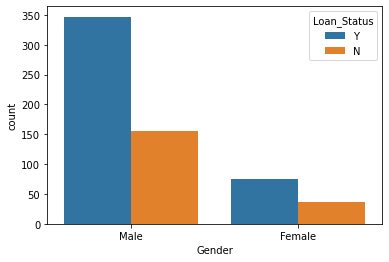

In [17]:
sns.countplot(x='Gender',data=df,hue='Loan_Status')
plt.show()

maore male apply for loan

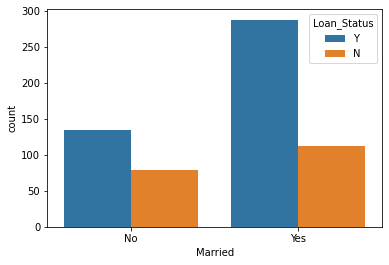

In [18]:
sns.countplot(x='Married',data=df,hue='Loan_Status')
plt.show()

more married people apply for loan

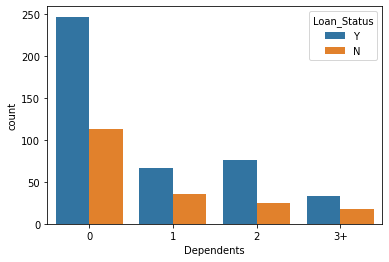

In [19]:
sns.countplot(x='Dependents',data=df,hue='Loan_Status')
plt.show()

more applicants are having 0 dependents have Yes status

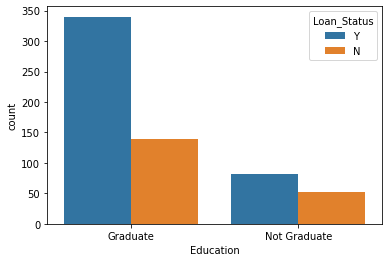

In [20]:
sns.countplot(x='Education',data=df,hue='Loan_Status')
plt.show()

More graduates apply for loan

In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

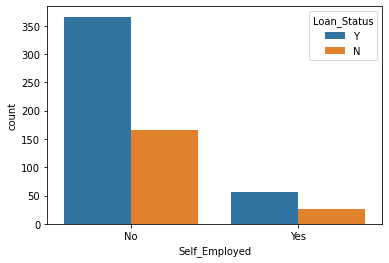

In [22]:
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')
plt.show()

self_employe more likely to apply for loan

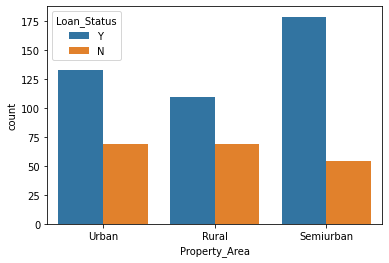

In [23]:
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
plt.show()

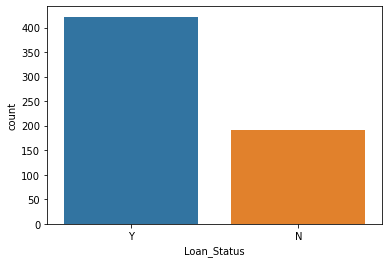

In [24]:
sns.countplot(x='Loan_Status',data=df)
plt.show()

more loan status is yes

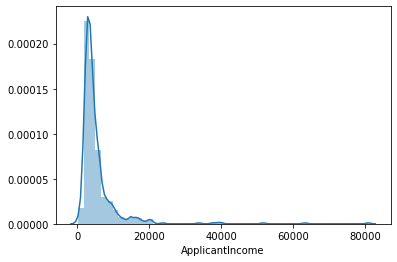

In [25]:
sns.distplot(df["ApplicantIncome"])

data is right skewed

<function matplotlib.pyplot.show(*args, **kw)>

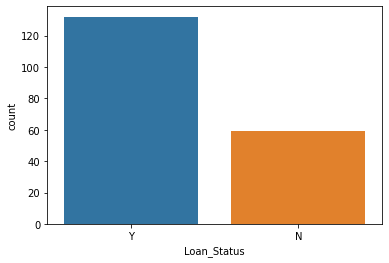

In [26]:
sns.countplot(x='Loan_Status',data=df.loc[df["ApplicantIncome"]>5000])
plt.show

In [27]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<function matplotlib.pyplot.show(*args, **kw)>

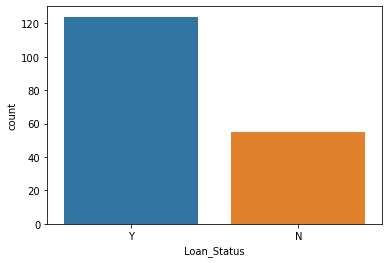

In [28]:
sns.countplot(x='Loan_Status',data=df.loc[(df['ApplicantIncome']>5000)&(df['CoapplicantIncome']<5000)])
plt.show

In [29]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

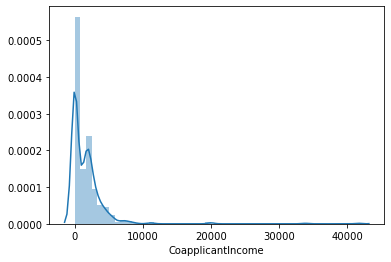

In [30]:
sns.distplot(df['CoapplicantIncome'])


this graph is left skewd

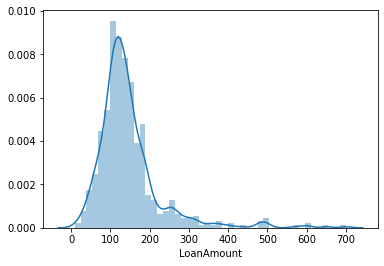

In [31]:
sns.distplot(df['LoanAmount'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


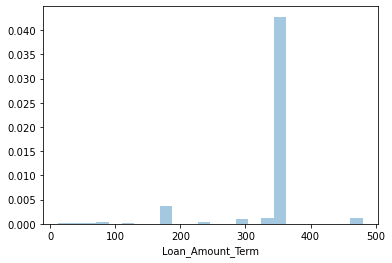

In [32]:
sns.distplot(df['Loan_Amount_Term'])# more applicant present in320-350

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


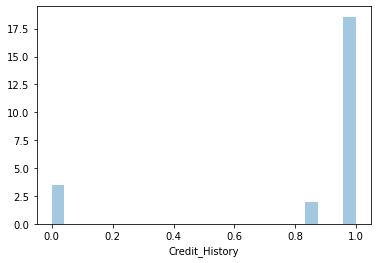

In [33]:
sns.distplot(df['Credit_History'])

the one who have credict history 1 are more

In [34]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

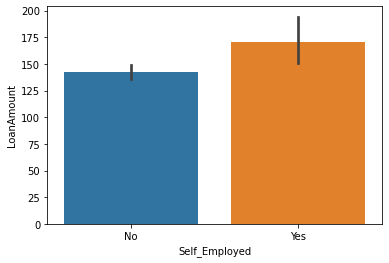

In [35]:
sns.barplot(x="Self_Employed",y='LoanAmount',data=df)
plt.show()

self employed are applying for more loan are getting approval

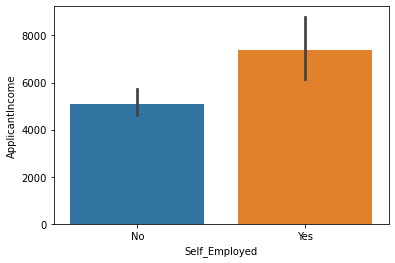

In [36]:
sns.barplot(x="Self_Employed",y='ApplicantIncome',data=df)
plt.show()

if the self employed income is more they are more likely to get loan

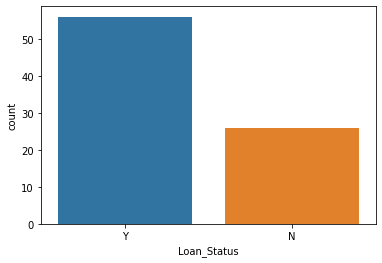

In [37]:
sns.countplot(x="Loan_Status",data=df.loc[df['Self_Employed']=="Yes"])
plt.show()

self employed are more likely to grt loan

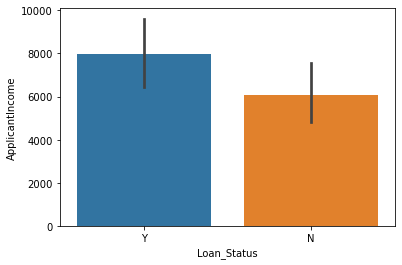

In [38]:
sns.barplot(x="Loan_Status",y="ApplicantIncome",data= df.loc[df["Self_Employed"]=="Yes"])
plt.show()

applicant income is no that much impact on loan status

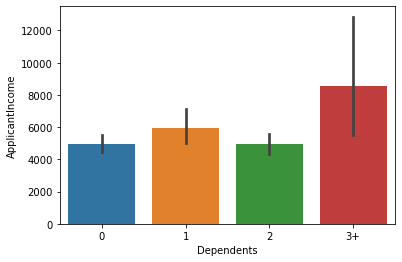

In [39]:
sns.barplot(y="ApplicantIncome",x="Dependents",data=df)
plt.show()

if dependents are more applicants income is more

In [40]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

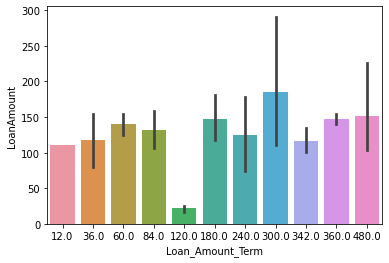

In [41]:
sns.barplot(x="Loan_Amount_Term",y="LoanAmount",data=df)

loan amount tem having vaue 300 have more loan

In [42]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [43]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [44]:
skew=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

In [45]:
import numpy as np

In [46]:
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [47]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674197,0.000000,4.993232,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430327,7.319202,4.859812,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006701,0.000000,4.204693,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.857094,7.765993,4.795791,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699681,0.000000,4.955827,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972811,0.000000,4.276666,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,8.320448,0.000000,3.713572,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8.996280,5.484797,5.537334,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,8.933796,0.000000,5.236442,360.0,1.0,Urban,Y


## splitting the data

In [48]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

In [49]:
x.drop(columns=['Loan_ID'],inplace=True)

In [50]:
x=pd.get_dummies(x,drop_first=True)# getting dummies to convert catogorical data

In [51]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.993232,360.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,360.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,360.0,1.0,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,360.0,1.0,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,360.0,1.0,0,0,0,0,0,0,0,0,0
610,8.320448,0.000000,3.713572,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8.996280,5.484797,5.537334,360.0,1.0,1,1,1,0,0,0,0,0,1
612,8.933796,0.000000,5.236442,360.0,1.0,1,1,0,1,0,0,0,0,1


In [52]:

# here we are converting the target value to numeric valuefrom sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
en.fit(y)
y=en.transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [53]:
x.shape

(614, 14)

In [54]:
y.shape

(614,)

In [55]:
# using standerd scaler to scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(x)
x = pd.DataFrame(x,columns=x.columns)

In [56]:
#using SMOTE to balence the data
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
x, y = oversample.fit_resample(x, y)

In [57]:
x.shape

(844, 14)

In [58]:
y.shape

(844,)

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
import warnings
warnings.filterwarnings('ignore')

In [65]:
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS =0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    predrf= lr.predict(x_test)
    accu = accuracy_score(y_test,predrf)
    if accu >maxAccu:
        maxAccu = accu
        maxRS =i
print('best accuray score is',maxAccu,"random_state is",i)

best accuray score is 0.7992125984251969 random_state is 199


In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=199)

In [67]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
predl = lg.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,predl))
print(confusion_matrix(y_test,predl))
print(classification_report(y_test,predl))

accuracy score :
0.7156398104265402
[[65 42]
 [18 86]]
              precision    recall  f1-score   support

           0       0.78      0.61      0.68       107
           1       0.67      0.83      0.74       104

    accuracy                           0.72       211
   macro avg       0.73      0.72      0.71       211
weighted avg       0.73      0.72      0.71       211



In [68]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

accuracy score :
0.7819905213270142
[[82 25]
 [21 83]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       107
           1       0.77      0.80      0.78       104

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211



In [69]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.5165876777251185
[[  6 101]
 [  1 103]]
              precision    recall  f1-score   support

           0       0.86      0.06      0.11       107
           1       0.50      0.99      0.67       104

    accuracy                           0.52       211
   macro avg       0.68      0.52      0.39       211
weighted avg       0.68      0.52      0.38       211



In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predr = rf.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,predr))
print(confusion_matrix(y_test,predr))
print(classification_report(y_test,predr))

accuracy score :
0.7914691943127962
[[82 25]
 [19 85]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       107
           1       0.77      0.82      0.79       104

    accuracy                           0.79       211
   macro avg       0.79      0.79      0.79       211
weighted avg       0.79      0.79      0.79       211



In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.7251184834123223
[[78 29]
 [29 75]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       107
           1       0.72      0.72      0.72       104

    accuracy                           0.73       211
   macro avg       0.73      0.73      0.73       211
weighted avg       0.73      0.73      0.73       211



In [72]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
pred = ada.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.7725118483412322
[[69 38]
 [10 94]]
              precision    recall  f1-score   support

           0       0.87      0.64      0.74       107
           1       0.71      0.90      0.80       104

    accuracy                           0.77       211
   macro avg       0.79      0.77      0.77       211
weighted avg       0.79      0.77      0.77       211



In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gd =GradientBoostingClassifier() 
gd.fit(x_train,y_train)
pred = gd.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.7962085308056872
[[74 33]
 [10 94]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       107
           1       0.74      0.90      0.81       104

    accuracy                           0.80       211
   macro avg       0.81      0.80      0.79       211
weighted avg       0.81      0.80      0.79       211



In [74]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
predet = etc.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))

accuracy score :
0.7914691943127962
[[82 25]
 [19 85]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       107
           1       0.77      0.82      0.79       104

    accuracy                           0.79       211
   macro avg       0.79      0.79      0.79       211
weighted avg       0.79      0.79      0.79       211



In [75]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
print('accuracy score :',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score :
0.5071090047393365
[[107   0]
 [104   0]]
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       107
           1       0.00      0.00      0.00       104

    accuracy                           0.51       211
   macro avg       0.25      0.50      0.34       211
weighted avg       0.26      0.51      0.34       211



In [76]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lg,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7453296703296702


In [77]:
scr = cross_val_score(dt,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7536207382361229


In [78]:
scr = cross_val_score(sv,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.5071076359537898


In [79]:
scr = cross_val_score(rf,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.8176105945336716


In [80]:
scr = cross_val_score(knn,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7263102282333052


In [81]:
scr = cross_val_score(ada,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7500493096646943


In [82]:
scr = cross_val_score(gd,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7974570301493379


In [83]:
scr = cross_val_score(etc,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.7962665539588618


In [84]:
scr = cross_val_score(sgd,x,y,cv=5)
print('coss validation score is',scr.mean())

coss validation score is 0.5035573400958017


The difference between the accuracy value and cross validation is less in RandomForestClassifier, so we are Hyper Tuning this model

In [137]:
import numpy as np

In [139]:
parameters ={'n_estimators':[10,100,500,1000],
            'max_features':['auto', 'sqrt']}

In [140]:
gcv = GridSearchCV(RandomForestClassifier(),parameters, cv =5)

In [141]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 100, 500, 1000]})

In [142]:
gcv.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [143]:
fimal_mod =RandomForestClassifier(n_estimators=500,max_features='sqrt')
fimal_mod.fit(x_train,y_train)
predict= fimal_mod.predict(x_test)
accu = accuracy_score(y_test,predict)
print(accu)

0.8104265402843602


In [144]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [145]:
import matplotlib.pyplot as plt

AUC ROC Score: 0.7918314162473041


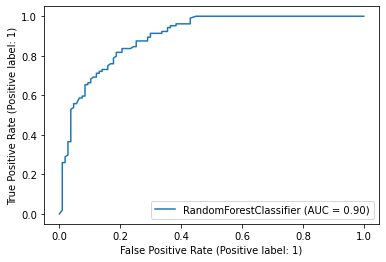

In [146]:
print("AUC ROC Score:",roc_auc_score(y_test,predr))
plot_roc_curve(fimal_mod,x_test,y_test)
plt.show()

### Saving the model

In [147]:
import joblib
joblib.dump(fimal_mod,"loanrf1.pkl")

['loanrf1.pkl']

## Loading the saved model 

In [148]:
model = joblib.load('loanrf1.pkl')

In [149]:
prediction = model.predict(x_test)

In [150]:
print(accuracy_score(y_test,prediction)*100)

81.04265402843602


In [151]:
prediction= pd.DataFrame(prediction)

In [152]:
prediction.to_csv('loanrf.csv')

In [153]:
prediction

,0
0,1
1,0
2,0
3,0
4,1
...,...
206,1
207,1
208,1
209,0


#### Conclusion
--> The aim of the project is to predict the status of the loan application
--> In EDA we remove all the null values present and replace them with the mean and mode of the column
--> using the vizualization we are able to conclude the relation between the data
-->finally able to build the model and cross validate it and balenced it with the SMOTE and hyper tunned the model
-->and lastly saved the model in joblib